In [22]:
import cv2


img = cv2.imread('test_picture.jpg')
height, width = img.shape[:2]
result = cv2.resize(img, (2 * width, 2 * height), interpolation=cv2.INTER_CUBIC)

cv2.imshow('result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
import numpy as np


M = np.float32([[1, 0, 100], [0, 1, 50]])
dst = cv2.warpAffine(img, M, (width, height))

cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
M = cv2.getRotationMatrix2D((width / 2, height / 2), 37, 1)
dst = cv2.warpAffine(img, M, (width, height))

cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
pts1 = np.float32([[50, 50], [200,50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (width, height))

cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
pts1 = np.float32([[27, 34], [182, 27],[ 13, 190], [191, 191]])
pts2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])

M = cv2.getPerspectiveTransform(pts1, pts2)

dst = cv2.warpPerspective(img, M, (300, 300))

cv2.imshow('image', img)
cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [27]:
logo = cv2.imread('logo.png')

lower_reso = img
for _ in range(4):
    lower_reso = cv2.pyrDown(lower_reso)

cv2.imshow('img', img)
cv2.imshow('lower_reso', lower_reso)

cv2.waitKey(0)
cv2.destroyAllWindows()

up_reso = logo
for _ in range(3):
    up_reso = cv2.pyrUp(up_reso)

cv2.imshow('img', logo)
cv2.imshow('lower_reso', up_reso)

cv2.waitKey(0)
cv2.destroyAllWindows()

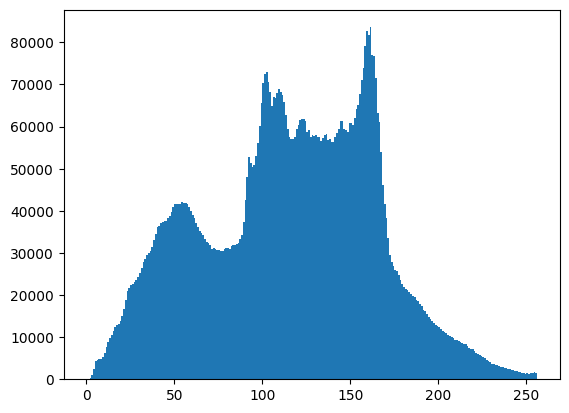

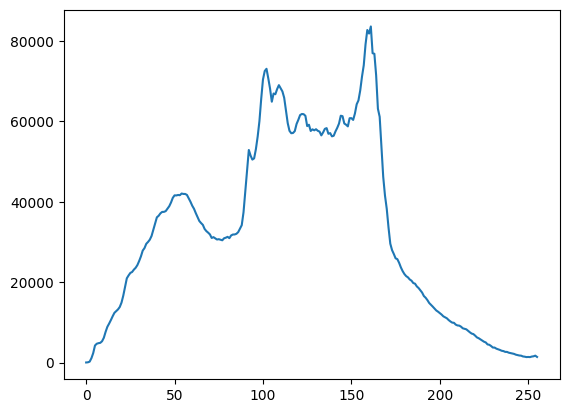

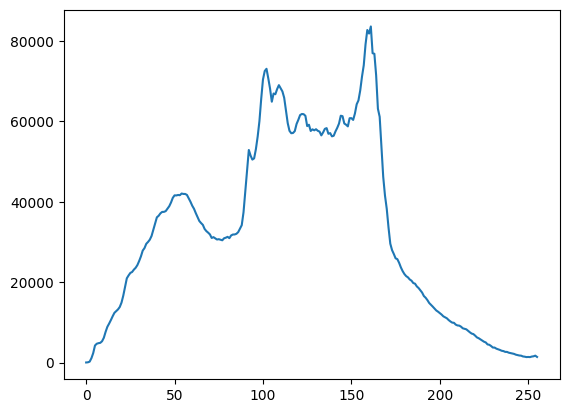

In [28]:
import matplotlib.pyplot as plt


gray_img = cv2.imread('test_picture.jpg', 0)
# Построение гистограммы в matplotlib
plt.hist(gray_img.ravel(), 256, [0, 256])
plt.show()

# Построение гистограммы с помощью numpy
hist, bins = np.histogram(gray_img.ravel(), 256, [0, 256])
plt.plot(hist)
plt.show()

hist = np.bincount(gray_img.ravel(), minlength=256)
plt.plot(hist)
plt.show()

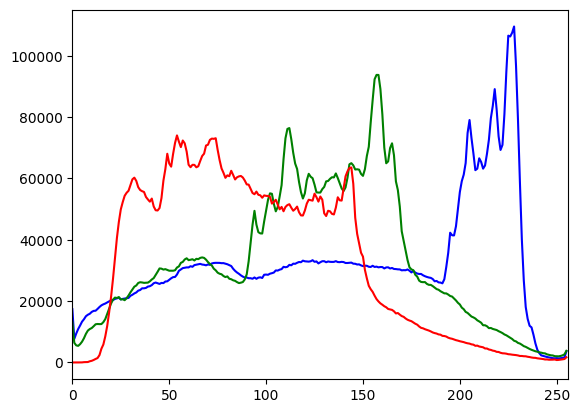

In [29]:
color = ('b', 'g', 'r')

# Построение гистограммы для каждого цвета в цветном изображении с использованием функции cv2
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.show()

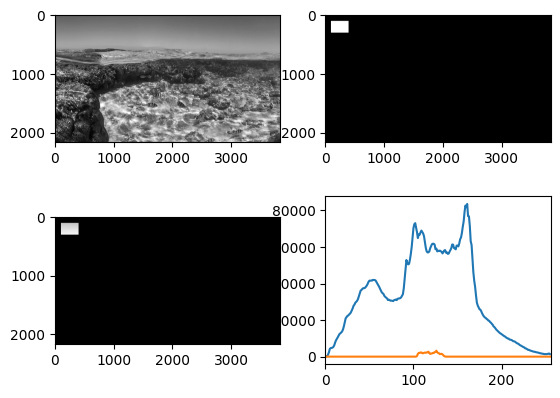

In [30]:
# Расчет гистограммы для части изображения
# Создаем маску для части изображения
mask = np.zeros(gray_img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(gray_img, gray_img, mask=mask)

# Строим диаграму с и без маски
hist_full = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
hist_mask = cv2.calcHist([gray_img], [0], mask, [256], [0, 256])

plt.subplot(221)
plt.imshow(gray_img, 'gray')

plt.subplot(222)
plt.imshow(mask, 'gray')

plt.subplot(223)
plt.imshow(masked_img, 'gray')

plt.subplot(224)
plt.plot(hist_full)
plt.plot(hist_mask)
plt.xlim([0, 256])

plt.show()

In [31]:
# Выравнивание гистограмм
equ = cv2.equalizeHist(gray_img)
# Сопоставление изображений
result = np.hstack((gray_img, equ))
cv2.imwrite('result.jpg', result)

True

In [32]:
# Применение CLAHE фильтра
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
cll = clahe.apply(gray_img)
result = np.hstack((gray_img, cll))

cv2.imwrite('clahe.jpg', result)

True

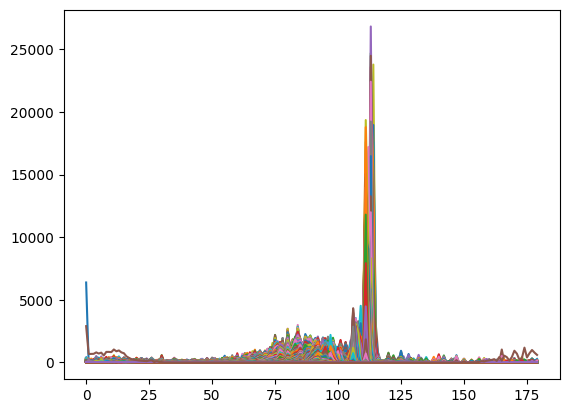

In [33]:
# 2D гистограмма
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
plt.plot(hist)

In [35]:
# Создаем объект, с которым сравниваем
roi = cv2.imread('red_rose.png')
hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

# Открываем изображение в котором ищем
target = cv2.imread('roses.jpg')
hsv_t = cv2.cvtColor(target, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv_t)

# Рассчитываем гистограммы для обоих изображений
M = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
I = cv2.calcHist([hsv_t], [0, 1], None, [180, 256], [0, 180, 0, 256])

# Создаем новое изображение с вероятностями быть целью
R = M / I
B = R[h.ravel(), s.ravel()]
B = np.minimum(B, 1)
B = B.reshape(hsv_t.shape[:2])

# Делаем свертку с круговым диском
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
cv2.filter2D(B, -1, disc, B)
B = np.uint8(B)
cv2.normalize(B, B, 0, 255, cv2.NORM_MINMAX)

# Производим пороговую обработку
ret, thresh = cv2.threshold(B, 50, 255, 0)

cv2.imshow('image', target)
cv2.imshow('thresh', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\Lapte\AppData\Local\Temp\ipykernel_8616\2388790860.py:15: RuntimeWarning: divide by zero encountered in divide
  R = M / I
C:\Users\Lapte\AppData\Local\Temp\ipykernel_8616\2388790860.py:15: RuntimeWarning: invalid value encountered in divide
  R = M / I
